# Assignment 7

*(Due Saturday, November 2, 2019 at noon.)*

1) Load either your dataset, `brfss`, or `nhis` and create at least three derived fields from the data there. Ideally, these will be fields you'll need for your final project.

I included my code from last week as I already made several derived fields. I was going to count those as two and then have a more complex code following. Mainly, I separated what was the OCCURRED_ON_DATE into separate date, day, moth, year, and time columns as well as ordinal year to make it easy to see what day was the one with the most. I also had to conver lat and long into a numerical number as they were seen as strings in order to do the next part of my code.

In [1]:
import numpy as np
import pandas as pd
import datetime as dt

bostoncrime = pd.read_excel('../dataset/crime1yr.xlsx', sheet_name=0)
bostoncrime = bostoncrime.drop(["YEAR", "MONTH", "HOUR","Location"], axis=1)
bostoncrime = bostoncrime.fillna('N')
pd.to_datetime(bostoncrime.OCCURRED_ON_DATE)
bostoncrime['DATE'] = [d.date() for d in bostoncrime['OCCURRED_ON_DATE']]
bostoncrime['DAY'] = pd.DatetimeIndex(bostoncrime['DATE']).day
bostoncrime['MONTH'] = pd.DatetimeIndex(bostoncrime['DATE']).month
bostoncrime['YEAR'] = pd.DatetimeIndex(bostoncrime['DATE']).year
bostoncrime['ORDINAL_DAY'] = [d.toordinal() for d in bostoncrime['DATE']]
bostoncrime['TIME'] = [d.time() for d in bostoncrime['OCCURRED_ON_DATE']]
bostoncrime = bostoncrime.drop(["OCCURRED_ON_DATE"], axis=1)
bostoncrime['Long'] = pd.to_numeric(bostoncrime['Long'],errors='coerce')
bostoncrime['Lat'] = pd.to_numeric(bostoncrime['Lat'],errors='coerce')

#There are random values of 1 or 0 that need to be removed (entire row)

# Get names of indexes for which column Lat has value less than 42
indexLat = bostoncrime[bostoncrime['Lat'] < 42].index
# Delete these row indexes from dataFrame
bostoncrime.drop(indexLat, inplace=True)

# Get names of indexes for which column Long has value greater -70
indexLong = bostoncrime[bostoncrime['Long'] > -70].index
# Delete these row indexes from dataFrame
bostoncrime.drop(indexLong, inplace=True)

# Get names of indexes for which column DISTRICT has value of N
indexDISTRICT = bostoncrime[bostoncrime['DISTRICT'] == 'N'].index
# Delete these row indexes from dataFrame
bostoncrime.drop(indexDISTRICT, inplace=True)

#save cleaned file
bostoncrime.to_excel('../dataset/cleancrimeboston.xlsx')

In [2]:
bostoncrime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,DAY_OF_WEEK,UCR_PART,STREET,Lat,Long,DATE,DAY,MONTH,YEAR,ORDINAL_DAY,TIME
0,I182070933,724,Auto Theft,AUTO THEFT,B2,330,N,Monday,Part One,NORMANDY ST,42.306072,-71.082733,2018-09-03,3,9,2018,736940,21:25:00
1,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,N,Monday,Part Three,NEWCOMB ST,42.334182,-71.078664,2018-09-03,3,9,2018,736940,21:16:00
2,I182070936,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,N,Monday,Part Three,TALBOT AVE,42.290196,-71.071590,2018-09-03,3,9,2018,736940,21:09:00
3,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,N,Monday,Part Three,DELHI ST,42.275365,-71.090361,2018-09-03,3,9,2018,736940,21:05:00
4,I182070931,301,Robbery,ROBBERY - STREET,C6,177,N,Monday,Part One,MASSACHUSETTS AVE,42.331521,-71.070853,2018-09-03,3,9,2018,736940,20:48:00


So here, I am attempting to map where the crime is taking place using the lat/long points and a boston city map shapefile

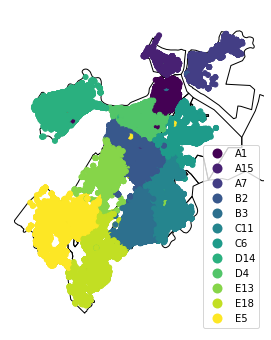

In [49]:
import pandas as pd
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import descartes
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

%matplotlib inline

#import map of boston from shape file
boston_map = gpd.read_file('../dataset/Zoning_Districts/Zoning_Districts.shp')

#specify coordinate referece system as lat/long points
crs = {'init': 'epsg:4326'}

#create points using longitude and latitude
geometry = [Point(xy) for xy in zip(bostoncrime['Long'], bostoncrime['Lat'])]

#make a geometry column to use for plotting
geo_bostoncrime = gpd.GeoDataFrame(bostoncrime, crs=crs, geometry=geometry)

#No longer need lat/long colums
geo_bostoncrime = geo_bostoncrime.drop(["Long","Lat"], axis=1)

geo_bostoncrime.head()

#plot the map color coded by district number
ax = gplt.polyplot(
    boston_map, projection=gcrs.AlbersEqualArea())

colormap_bydistrict = gplt.pointplot(
    geo_bostoncrime[geo_bostoncrime['DISTRICT'].notnull()],
    hue='DISTRICT', ax=ax, legend=True)



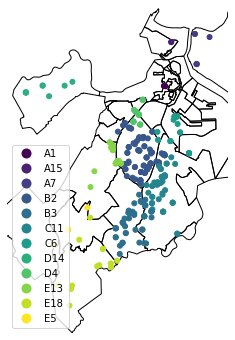

In [50]:
ax = gplt.polyplot(
    boston_map, projection=gcrs.AlbersEqualArea())

gplt.pointplot(
    geo_bostoncrime[geo_bostoncrime['SHOOTING'] == 'Y'],
    hue='DISTRICT', ax=ax, legend=True)

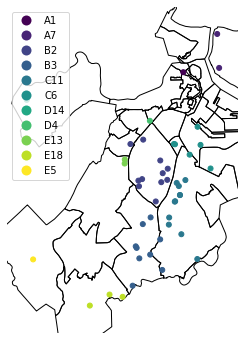

In [63]:
ax = gplt.polyplot(
    boston_map, projection=gcrs.AlbersEqualArea())

gplt.pointplot(
    geo_bostoncrime[geo_bostoncrime['OFFENSE_CODE'] == 111],
    hue='DISTRICT', ax=ax, legend=True)

2) Run the following cell.

In [2]:
import seaborn as sns
sns.__version__

'0.9.0'

#### Submitting

In the Terminal (Mac) or Git Bash (Windows):

`git commit -a -m 'Assignment 7 completed'`  
`git push`

### Reading

1. [_Python for Data Analysis_](https://uri-primo.hosted.exlibrisgroup.com/permalink/f/10nopmq/01URI_ALMA51209454630002396):
    * Chapter 9